In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

import misc

In [2]:
#dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [3]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
acq_list = [f"A{i:d}" for i in range(1, 11)]
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [4]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [5]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [6]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [7]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

Text(0.5, 1.0, 'Open-sky (texting)')

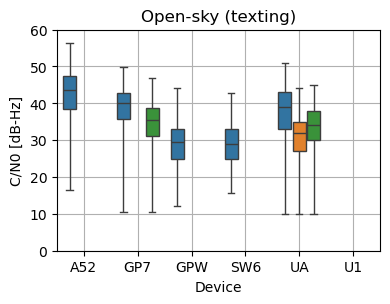

In [9]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (texting)")

## Swinging

In [12]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING'])

Text(0.5, 1.0, 'Open-sky (swinging)')

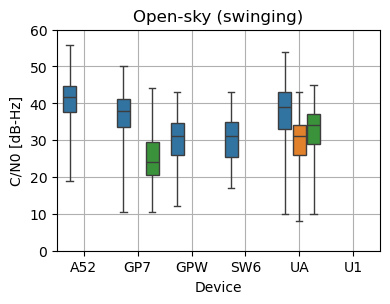

In [13]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (swinging)")

## Pocket

In [14]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

Text(0.5, 1.0, 'Open-sky (pocket)')

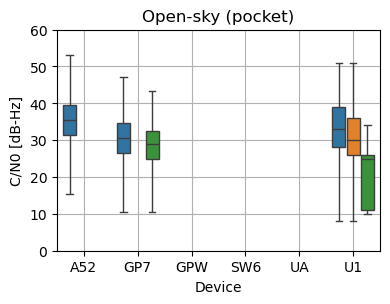

In [15]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (pocket)")

## Comparing CN0 between modes

In [16]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [17]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

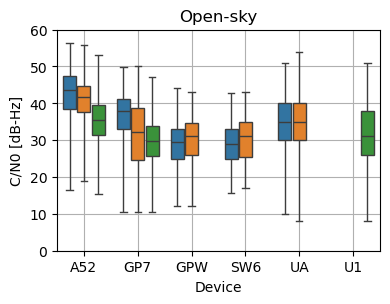

In [18]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
# 

Text(0.5, 1.0, 'Open-sky')

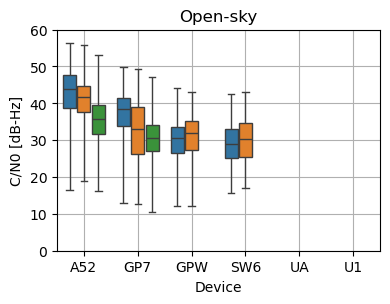

In [19]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

Text(0.5, 1.0, 'Open-sky')

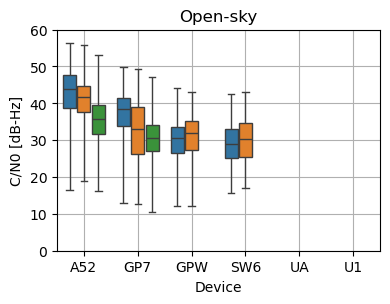

In [20]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

## Comparing signal tracked between mode

In [21]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [22]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

In [23]:
# log = log_dict['GP7']
# log = log[log['acquisition'] == 'A8']
# _df = log[['TimeNanos', 'prn', 'acquisition', 'mode']]
# _df = _df.groupby(['acquisition', 'TimeNanos', 'mode']).nunique()
# _df = _df.reset_index().drop(columns=['acquisition', 'TimeNanos', 'mode'])
# _df.plot()
# plt.ylim((0, 60))

In [24]:
# log = log_dict_filtered['GP7']
# log = log[log['acquisition'] == 'A8']
# _df = log[['TimeNanos', 'prn', 'acquisition', 'mode']]
# _df = _df.groupby(['acquisition', 'TimeNanos', 'mode']).nunique()
# _df = _df.reset_index().drop(columns=['acquisition', 'TimeNanos', 'mode'])
# _df.plot()
# plt.ylim((0, 60))

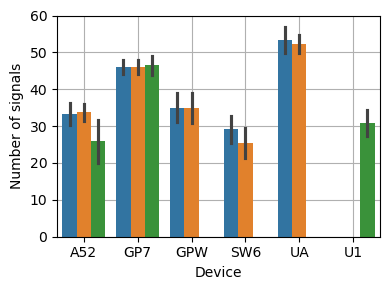

In [25]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

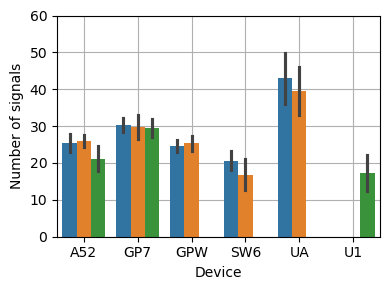

In [26]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

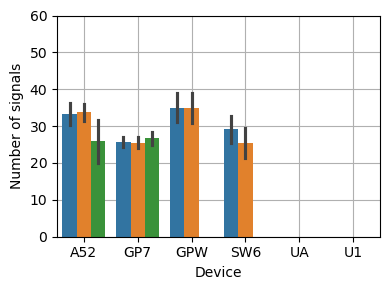

In [27]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

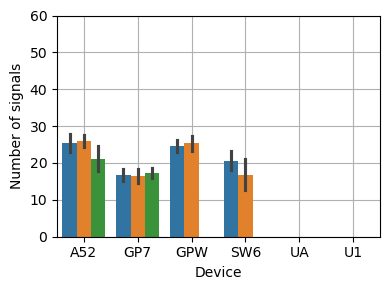

In [28]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Light indoor (train station)

In [29]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2', 'A3', 'A4']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [30]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey, 
                            indoor_only=True)

In [31]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                            indoor_only=True)

In [32]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [33]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

Text(0.5, 1.0, 'Light indoor (texting)')

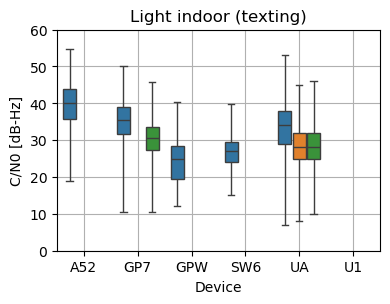

In [34]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (texting)")
 

## Swinging

In [35]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING'])

Text(0.5, 1.0, 'Light indoor (swinging)')

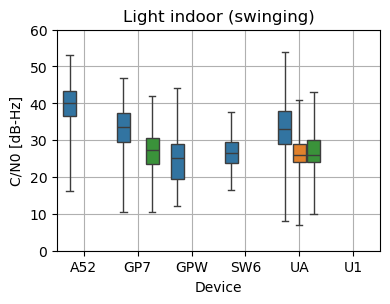

In [36]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (swinging)")
 

## Pocket

In [37]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

Text(0.5, 1.0, 'Light indoor (pocket)')

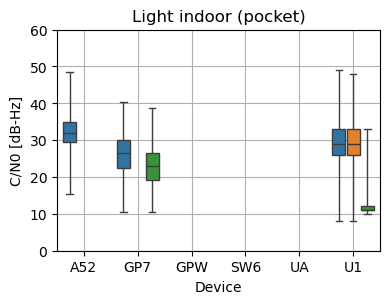

In [38]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (pocket)")
 

## Comparing modes

In [39]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [40]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

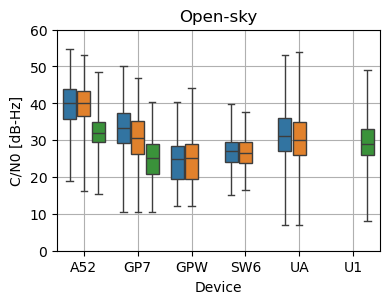

In [41]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
# 

Text(0.5, 1.0, 'Open-sky')

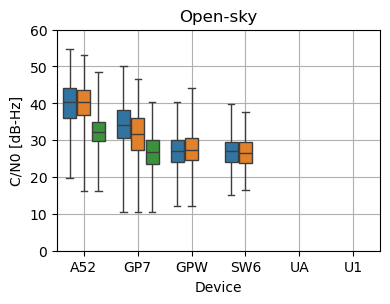

In [42]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

Text(0.5, 1.0, 'Open-sky')

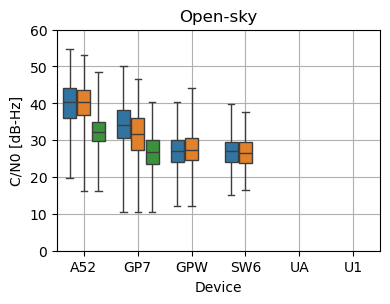

In [43]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

## Comparing number of satellites

In [44]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [45]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

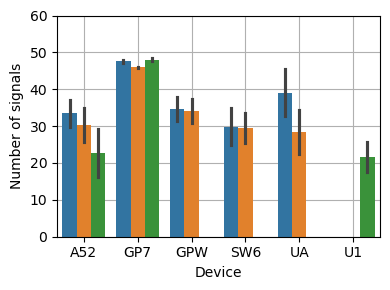

In [46]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

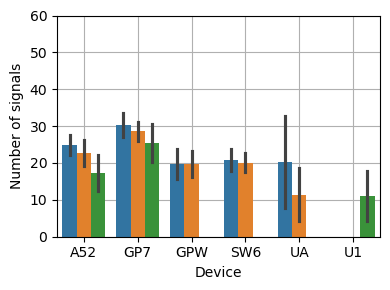

In [47]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

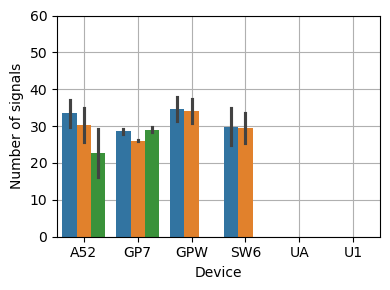

In [48]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

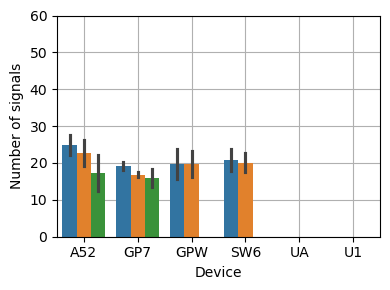

In [49]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Urban canyioning 

In [50]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [51]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [52]:
# Load ULISS RINEX files
log_rinex = {}
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [53]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [54]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['TEXTING'])

Text(0.5, 1.0, 'Urban canyoning (texting)')

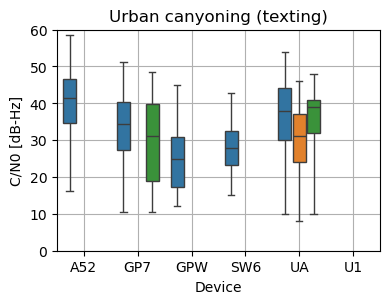

In [55]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (texting)")
 

## Swinging
NOT APPLICABLE 

## Pocket

## Comparing modes

In [56]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [57]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

Text(0.5, 1.0, 'Open-sky')

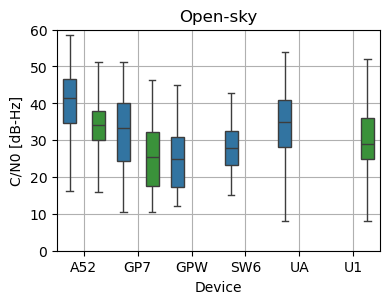

In [58]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
# 

Text(0.5, 1.0, 'Open-sky')

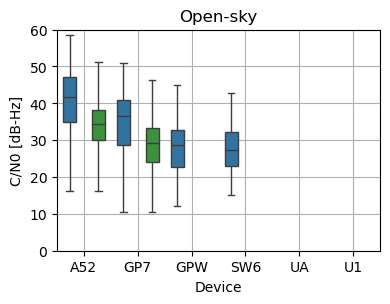

In [59]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

Text(0.5, 1.0, 'Open-sky')

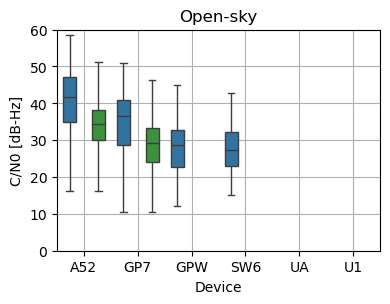

In [60]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
plt.title("Open-sky")
 

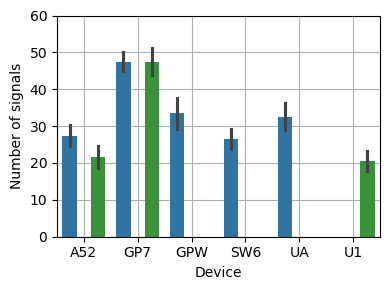

In [71]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

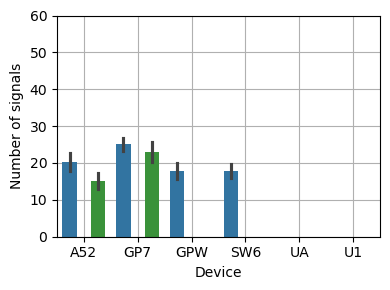

In [62]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

In [63]:
log_dict = misc.selectMode([log_android, log_rinex], mode=['POCKET'])

Text(0.5, 1.0, 'Urban canyoning (pocket)')

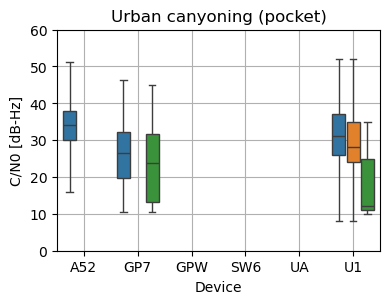

In [64]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (pocket)")
 

## Comparing number of satellite between modes

In [65]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [66]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

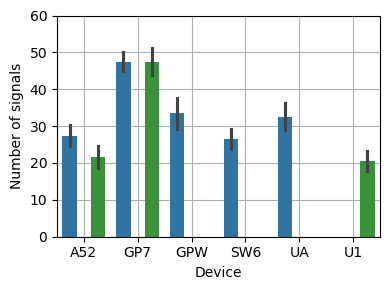

In [67]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

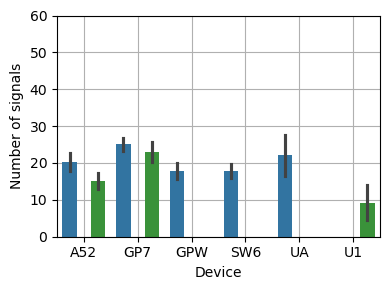

In [68]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

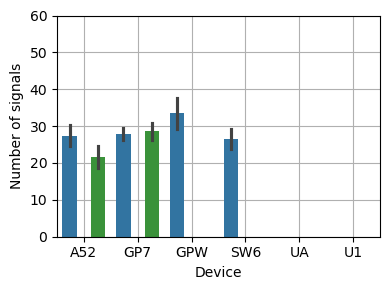

In [69]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

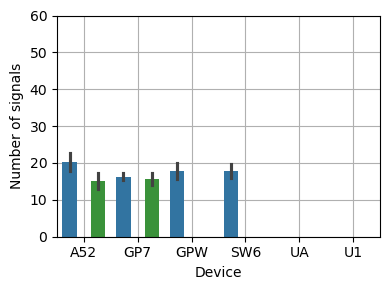

In [70]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)